In [1]:
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df_original = dataset['train'].to_pandas()

# Data Cleansing
df_original['job_posted_date'] = pd.to_datetime(df_original['job_posted_date'])
df_original['job_skills'] = df_original['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)
df_altered = df_original.copy()
df_altered = df_altered[df_altered['job_title_short']=='Data Analyst']

In [5]:
df_Data_explode = df_altered.explode('job_skills')
skill_stats = df_Data_explode.groupby('job_skills').agg(
    median_salary=('salary_year_avg', 'median'),
    skill_count=('job_skills', 'count')
)


In [10]:
#Limit to top N skills
skill_countss = 20
skill_stats = skill_stats.sort_values(by='skill_count', ascending=False).head(skill_countss)

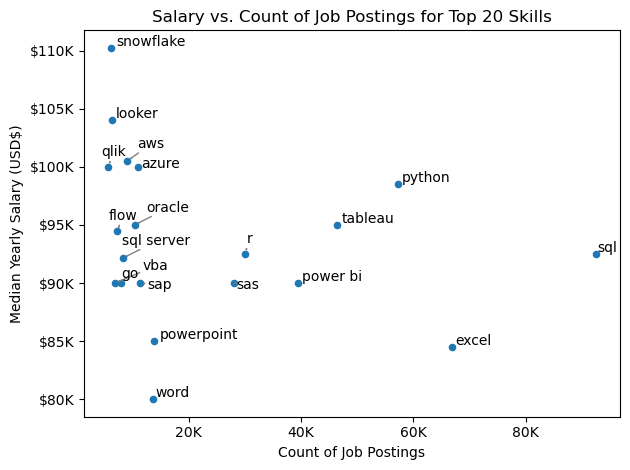

In [34]:
from adjustText import adjust_text
skill_stats.plot(kind='scatter', x='skill_count', y = 'median_salary')
texts = []
for i, txt in enumerate(skill_stats.index): 
    texts.append(plt.text(skill_stats['skill_count'].iloc[i], skill_stats['median_salary'].iloc[i], txt))
adjust_text(texts, arrowprops=dict(arrowstyle="->", color='grey', lw=1))
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, position: f'${int(y/1000)}K'))
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, position: f'{int(x/1000)}K'))
plt.xlabel('Count of Job Postings') 
plt.ylabel('Median Yearly Salary (USD$)') 
plt.title(f'Salary vs. Count of Job Postings for Top {skill_countss} Skills')
plt.tight_layout() 
plt.show()